<a href="https://colab.research.google.com/github/SamuvelrajG/forecasting-house/blob/main/google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving raw_sales.csv to raw_sales.csv


Load the Dataset

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/raw_sales.csv')
df.head()


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


Data Exploration

In [ ]:
# Dataset Info
df.info()

# Summary Statistics
df.describe()

# First few records
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


Check for Missing Values and Duplicates

In [ ]:
# Missing values
print("Missing Values:\n", df.isnull().sum())

# Duplicates
print("Duplicates:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()


Missing Values:
 datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64
Duplicates: 0


Visualize a Few Features

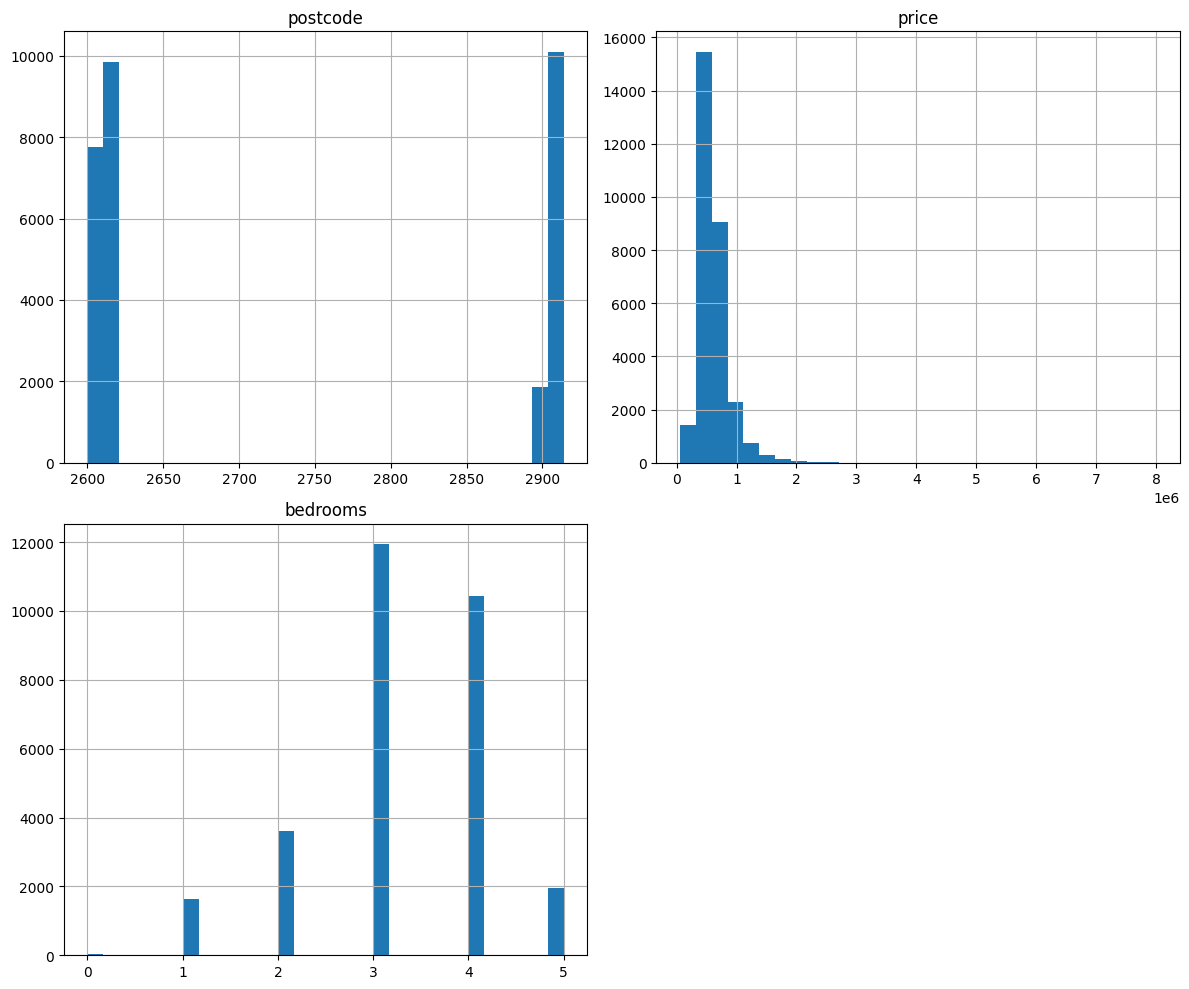

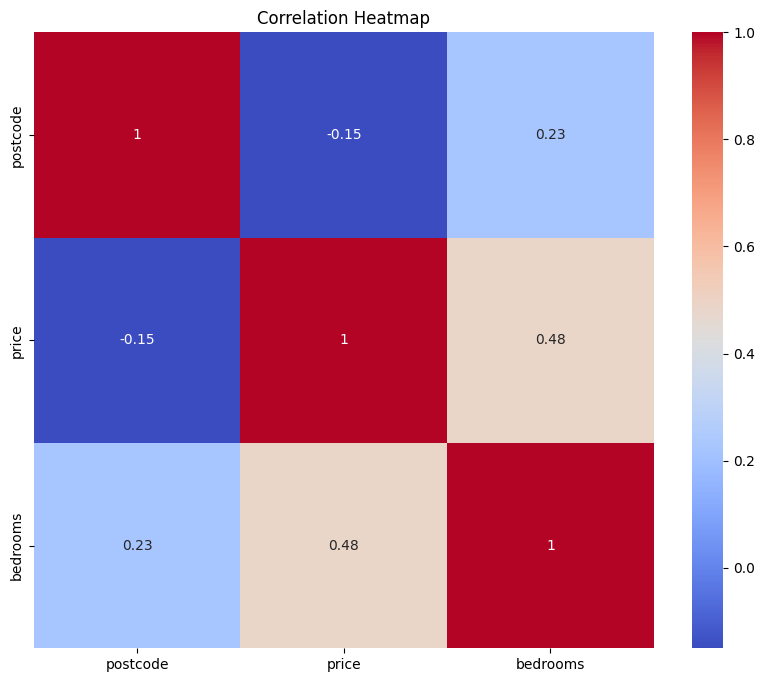

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of numerical columns
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Identify Target and Features

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('raw_sales.csv')

# Display column names
print("Column Names:")
print(df.columns.tolist())


Column Names:
['datesold', 'postcode', 'price', 'propertyType', 'bedrooms']


Convert Categorical Columns to Numerical

In [ ]:
# Identify categorical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['datesold', 'propertyType']


One-Hot Encoding

In [ ]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded.head()


,postcode,price,bedrooms,datesold_2007-02-27 00:00:00,datesold_2007-03-07 00:00:00,datesold_2007-03-09 00:00:00,datesold_2007-03-21 00:00:00,datesold_2007-04-04 00:00:00,datesold_2007-04-24 00:00:00,datesold_2007-04-30 00:00:00,...,datesold_2019-07-18 00:00:00,datesold_2019-07-19 00:00:00,datesold_2019-07-20 00:00:00,datesold_2019-07-22 00:00:00,datesold_2019-07-23 00:00:00,datesold_2019-07-24 00:00:00,datesold_2019-07-25 00:00:00,datesold_2019-07-26 00:00:00,datesold_2019-07-27 00:00:00,propertyType_unit
0,2607,525000,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2906,290000,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2905,328000,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2905,380000,4,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2906,310000,3,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


 Train-Test Split

In [ ]:
# Target and features
target = 'price'
features = ['datesold', 'postcode', 'propertyType', 'bedrooms']

X = df[features]
y = df[target]


 Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('raw_sales.csv')

# Target and features
target = 'price'
features = ['datesold', 'postcode', 'propertyType', 'bedrooms']

X = df[features]
y = df[target]

# Convert 'datesold' to datetime and extract useful features
X['datesold'] = pd.to_datetime(X['datesold'])
X['year'] = X['datesold'].dt.year
X['month'] = X['datesold'].dt.month
X = X.drop('datesold', axis=1)

# One-hot encode categorical column
X = pd.get_dummies(X, columns=['propertyType'], drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


<ipython-input-28-14e9053df833>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datesold'] = pd.to_datetime(X['datesold'])


RandomForestRegressor(random_state=42)

Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.596013553913987
Mean Squared Error: 27298040328.29305


 Make Predictions from New Input



In [ ]:
# Example dictionary (adjust keys to match your actual features)
new_data = {
    'Bedrooms': 3,
    'Bathrooms': 2,
    'SqFt': 1500,
    'Location': 'Downtown',  # Example categorical
    # Add other features as needed...
}
new_df = pd.DataFrame([new_data])


Convert to DataFrame and Encode

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load and preprocess
df = pd.read_csv("raw_sales.csv")
df['datesold'] = pd.to_datetime(df['datesold'])
df['year'] = df['datesold'].dt.year
df['month'] = df['datesold'].dt.month
df = df.drop(columns=['datesold'])

# Features and target
X = df.drop(columns=['price'])
y = df['price']

# Define categorical and numerical columns
categorical_cols = ['propertyType']
numerical_cols =_


Predict the Final Price

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load and preprocess
df = pd.read_csv("raw_sales.csv")
df['datesold'] = pd.to_datetime(df['datesold'])
df['year'] = df['datesold'].dt.year
df['month'] = df['datesold'].dt.month
df = df.drop(columns=['datesold'])

# Features and target
X = df.drop(columns=['price'])
y = df['price']

# Define preprocessing
categorical_cols = ['propertyType']
numerical_cols = ['bedrooms', 'postcode', 'year', 'month']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Build pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

# ✅ Predict new house price
new_data = pd.DataFrame([{
    'bedrooms': 4,
    'postcode': 3000,
    'propertyType': 'Unit',
    'year': 2025,
    'month': 5
}])

predicted_price = pipeline.predict(new_data)
print("Predicted House Price: ${:,.2f}".format(predicted_price[0]))


Predicted House Price: $687,765.85


 Deployment - Building an Interactive App (Gradio)

In [ ]:
!pip install gradio

import gradio as gr

def predict_price(**kwargs):
    input_df = pd.DataFrame([kwargs])
    input_encoded = pd.get_dummies(input_df)
    input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)
    input_scaled = scaler.transform(input_encoded)
    prediction = model.predict(input_scaled)
    return "${:,.2f}".format(prediction[0])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


Create a Prediction Function (Gradio UI)

In [ ]:
import gradio as gr

def predict_price(bedrooms, bathrooms, sqft, location):
    # Dummy prediction logic – replace with your model's prediction
    return f"Predicted price for {bedrooms} BR, {bathrooms} Bath, {sqft} SqFt in {location} is $XXX,XXX"

# Customize input widgets for your specific features
input_fields = [
    gr.Textbox(label="Bedrooms"),
    gr.Textbox(label="Bathrooms"),
    gr.Textbox(label="SqFt"),
    gr.Textbox(label="Location"),  # Example categorical feature
    # Add more fields as per your dataset
]

gr.Interface(fn=predict_price, inputs=input_fields, outputs="text", title="House Price Predictor").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a4974024dc17f34575.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
